# iFood CRM Data Analyst Case

## El objetivo
El objetivo del equipo es construir un modelo predictivo que produzca la mayor ganancia para la próxima campaña de marketing directo, programada para el próximo mes. La nueva campaña, la sexta, tiene como objetivo vender un nuevo dispositivo a la base de datos de clientes. Para construir el modelo se realizó una campaña piloto que involucró a 2.240 clientes. Los clientes fueron seleccionados al azar y contactados telefónicamente para la adquisición del aparato. Durante los siguientes meses, los clientes que compraron la oferta fueron debidamente etiquetados. El costo total de la campaña de muestra fue de 6.720 MU y los ingresos generados por los clientes que aceptaron la oferta fueron de 3.674 MU. Globalmente la campaña tuvo un beneficio de -3.046MU. La tasa de éxito de la campaña fue del 15%. El objetivo del equipo es desarrollar un modelo que prediga el comportamiento del cliente y aplicarlo al resto de la base de clientes. Con suerte, el modelo permitirá a la empresa elegir a los clientes que tienen más probabilidades de comprar la oferta y dejar de lado a los que no respondieron, lo que hará que la próxima campaña sea altamente rentable. Además, además de maximizar el beneficio de la campaña, el CMO está interesado en comprender para estudiar los rasgos característicos de aquellos clientes que están dispuestos a comprar el dispositivo.

El conjunto de datos contiene características sociodemográficas y firmográficas sobre 2.240 clientes que fueron contactados. Adicionalmente, contiene una bandera para aquellos clientes que respondieron a la campaña, comprando el producto.

## A. Exploracion de data EDA

In [56]:
#Importamos las librerias.

import pandas as pd
import io
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA


from numpy import isnan
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from sklearn.decomposition import PCA

from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std
from IPython.display import Image
import os
!ls ../input/

#agregamos la data
url = 'https://raw.githubusercontent.com/RodolfoMaya/ifood-data-business-analyst-test-latam/63bf6c72da5e144c15d2f4993be02dd3e3f8eb44/ml_project1_data.csv'

data = pd.read_csv(url)
data

ls: ../input/: No such file or directory


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [57]:
#imprimimos la informacion de cuantas colomnas y filas tiene la data ademas que tipo de dato es y si tiene valores nulos
print('Data shape:')
print(data.shape)
print('')
print('Information Data:')
print(data.info())

Data shape:
(2240, 29)

Information Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 

In [58]:
for column in data.columns:
    print(column,data[column].nunique())


ID 2240
Year_Birth 59
Education 5
Marital_Status 8
Income 1974
Kidhome 3
Teenhome 3
Dt_Customer 663
Recency 100
MntWines 776
MntFruits 158
MntMeatProducts 558
MntFishProducts 182
MntSweetProducts 177
MntGoldProds 213
NumDealsPurchases 15
NumWebPurchases 15
NumCatalogPurchases 14
NumStorePurchases 14
NumWebVisitsMonth 16
AcceptedCmp3 2
AcceptedCmp4 2
AcceptedCmp5 2
AcceptedCmp1 2
AcceptedCmp2 2
Complain 2
Z_CostContact 1
Z_Revenue 1
Response 2


### Limpieza de data

- Vamos a crear las columnas Age al dia de hoy, TotalSpending con el total de las compras en todas las categorias.
- En Marital_Status solo dejamos las categorias Alone, Married, In Couple y Divorced.
- Creamos la columna booleana Has_child teniendo en cuenta si tiene niños o adolecentes en casa.
- Creamos Educational_years asignandole a cada etapa educativa, la cantidad de años en promedio



In [59]:
from datetime import date
data['Age']=2022 - data['Year_Birth']
data['TotalSpending']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Marital_Status'] = data['Marital_Status'].replace({'Widow':'Divorced', 'Single':'Alone','Together':'In couple','Absurd':'Alone','YOLO':'Alone'})
data['Has_child'] = np.where(data.Kidhome + data.Teenhome > 0, 'Yes', 'No')
data['Educational_years']=data['Education'].replace({'Basic':5,'2n Cycle':8,'Graduation':12,'Master':18,'PhD':21})


- Tomando en cuenta Dt_Customer vamos a crear la columna Customer_For para saber en dias cuanto lleva siendo cliente.

In [60]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
dates=[]
for i in data['Dt_Customer']:
    i=i.date()
    dates.append(i)
days=[]
d1=max(dates)
for i in dates:
    delta=d1-i
    days.append(delta)
data['Customer_For']=days
data['Customer_For']=data.Customer_For.astype(str).map(lambda x: x[:-4])

data['Customer_For']=pd.to_numeric(data['Customer_For'], errors="coerce")


- Creamos las columnas NumAllPurchases con el total de compras, AverageCheck como el promedio de gasto por compra y ShareDealsPurchases como el promedio de deals por compras.
- Totamos TotalAcceptedCmp como la cantidad total de aceptacion de todas las campañas.
- Creamos ActiveDays como la cantidad de dias que ha estado el cliente en la app desde el 2022-02-25.

In [61]:
data['NumAllPurchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['AverageCheck'] = round((data['TotalSpending'] / data['NumAllPurchases']), 1)
data['ShareDealsPurchases'] = round((data['NumDealsPurchases'] / data['NumAllPurchases']) * 100, 1)
data['TotalAcceptedCmp'] = data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

data['Collected'] = '2022-02-25'
data['Collected'] = pd.to_datetime(data['Collected'])
data['Days_is_client'] = (data['Collected'] - data['Dt_Customer']).dt.days
data["ActiveDays"]=data["Days_is_client"]-data['Recency']

data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Has_child,Educational_years,Customer_For,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,Collected,Days_is_client,ActiveDays
0,5524,1957,Graduation,Alone,58138,0,0,2012-09-04,58,635,...,No,12,663,22,74,14,1,2022-02-25,3461,3403
1,2174,1954,Graduation,Alone,46344,1,1,2014-03-08,38,11,...,Yes,12,113,4,7,50,0,2022-02-25,2911,2873
2,4141,1965,Graduation,In couple,71613,0,0,2013-08-21,26,426,...,No,12,312,20,39,5,0,2022-02-25,3110,3084
3,6182,1984,Graduation,In couple,26646,1,0,2014-02-10,26,11,...,Yes,12,139,6,9,33,0,2022-02-25,2937,2911
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,Yes,21,161,14,30,36,0,2022-02-25,2959,2865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223,0,1,2013-06-13,46,709,...,Yes,12,381,16,84,12,0,2022-02-25,3179,3133
2236,4001,1946,PhD,In couple,64014,2,1,2014-06-10,56,406,...,Yes,21,19,15,30,47,1,2022-02-25,2817,2761
2237,7270,1981,Graduation,Divorced,56981,0,0,2014-01-25,91,908,...,No,12,155,18,69,6,1,2022-02-25,2953,2862
2238,8235,1956,Master,In couple,69245,0,1,2014-01-24,8,428,...,Yes,18,156,21,40,10,0,2022-02-25,2954,2946


In [62]:
pd.options.display.float_format = "{:.2f}".format
data_prev=data[['Age','Income','TotalSpending','Marital_Status','Has_child','Education','Educational_years']]
data_prev.describe()

,Age,Income,TotalSpending,Educational_years
count,2240.00,2216.00,2240.00,2240.00
mean,53.19,52247.25,605.80,14.41
std,11.98,25173.08,602.25,4.51
min,26.00,1730.00,5.00,5.00
25%,45.00,35303.00,68.75,12.00
50%,52.00,51381.50,396.00,12.00
75%,63.00,68522.00,1045.50,18.00
max,129.00,666666.00,2525.00,21.00


Antes de eliminar los valores atípicos podemos observar que:
   - El Income promedio es de $52,247.25$ dólares mientras que el Income medio es de $51,381.50$ dólares. Siendo el valor máximo igual a $666,666.00$ dólares y el $3$er cuartil siendo sólo igual a $68,522.00$ dólares.
   - El gasto promedio es de $605.80$ dólares mientras que el gasto medio es de $396.0$ dólares
   - La edad promedio es de $53$ años y el cliente más antiguo tiene $129$ años. Esto puede ser un error de digitación, por lo que lo eliminaremos.
   - El promedio de años de educación es de $14.4$ años, lo que corresponde a una licenciatura

In [63]:
df = data[['Age','Income','TotalSpending','Educational_years']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

El análisis de valor nos muestra que varias variables parecen tener valores atípicos:
   - Edad: 3 clientes mayores que la Valla Superior establecida en 74 años. Como es bastante raro, los eliminaremos.
   - Ingresos: varios valores superan la valla superior de 113K. Si bien tener un ingreso de 150k no es imposible, eliminaremos al cliente que tenga un ingreso de 666k.
   - Gasto: solo hay un valor atípico que está en el límite de la valla superior. No lo retiraremos.
   
Eliminaremos los datos atípicos antes de manejarlos con el valor nun-values.

In [64]:
data = data.drop(data[data['Income']> 600000].index).reset_index(drop=True)
data = data.drop(data[data['Age']>75].index).reset_index(drop=True)
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Has_child,Educational_years,Customer_For,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,Collected,Days_is_client,ActiveDays
0,5524,1957,Graduation,Alone,58138.00,0,0,2012-09-04,58,635,...,No,12,663,22,73.50,13.60,1,2022-02-25,3461,3403
1,2174,1954,Graduation,Alone,46344.00,1,1,2014-03-08,38,11,...,Yes,12,113,4,6.80,50.00,0,2022-02-25,2911,2873
2,4141,1965,Graduation,In couple,71613.00,0,0,2013-08-21,26,426,...,No,12,312,20,38.80,5.00,0,2022-02-25,3110,3084
3,6182,1984,Graduation,In couple,26646.00,1,0,2014-02-10,26,11,...,Yes,12,139,6,8.80,33.30,0,2022-02-25,2937,2911
4,5324,1981,PhD,Married,58293.00,1,0,2014-01-19,94,173,...,Yes,21,161,14,30.10,35.70,0,2022-02-25,2959,2865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,8372,1974,Graduation,Married,34421.00,1,0,2013-07-01,81,3,...,Yes,12,363,3,10.00,33.30,0,2022-02-25,3161,3080
2192,10870,1967,Graduation,Married,61223.00,0,1,2013-06-13,46,709,...,Yes,12,381,16,83.80,12.50,0,2022-02-25,3179,3133
2193,7270,1981,Graduation,Divorced,56981.00,0,0,2014-01-25,91,908,...,No,12,155,18,68.90,5.60,1,2022-02-25,2953,2862
2194,8235,1956,Master,In couple,69245.00,0,1,2014-01-24,8,428,...,Yes,18,156,21,40.10,9.50,0,2022-02-25,2954,2946


Como primer análisis, veremos la relación y el comportamiento de las variables Age, Income, Spending, Marital_Situation, Has_child, Education, Educational_years.

In [65]:
pd.options.display.float_format = "{:.2f}".format
dff=data[['Age','Income','TotalSpending','Marital_Status','Has_child','Education','Educational_years']]
dff.describe()

,Age,Income,TotalSpending,Educational_years
count,2196.00,2173.00,2196.00,2196.00
mean,52.66,51738.30,599.39,14.35
std,11.34,21531.49,600.22,4.49
min,26.00,1730.00,5.00,5.00
25%,44.00,34935.00,68.00,12.00
50%,52.00,51124.00,386.50,12.00
75%,62.00,68281.00,1034.00,18.00
max,75.00,162397.00,2525.00,21.00


Podemos ver que después de eliminar los valores atípicos tenemos:
   - El ingreso promedio es de $51,738.30$ dólares mientras que el ingreso medio es de $511,124$ dólares. Siendo el valor máximo igual a $162,397$ dólares y el 3er cuartil siendo solo igual a $68,281$ dólares.
   - El gasto promedio es de $599,39$ dólares mientras que el gasto medio es de $386,5$ dólares
   - La edad promedio es de $52$ años y el cliente más antiguo es de $75$ años.
   - El promedio de años de educación es de $14.3$ años, lo que corresponde a una licenciatura.

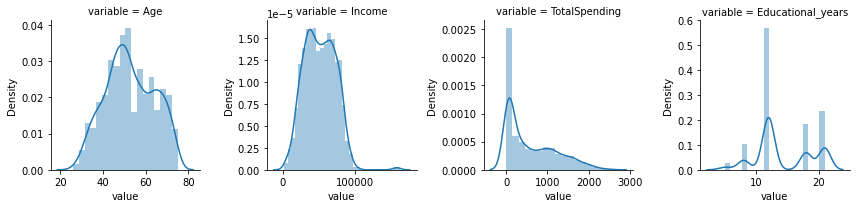

In [66]:
df = pd.DataFrame(data=dff, columns=['Age','Income','TotalSpending','Educational_years'])
#Permet de tracer les courbes de distribution de toutes les variables
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

Para manejar los nun-values de Income, podemos rellenar los datos faltantes con $0$.

In [67]:
dff.isna().sum()
data.isna().sum()
data['Income'] = data['Income'].fillna(0)
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
TotalSpending          0
Has_child              0
Educational_years      0
Customer_For           0
NumAllPurchases        0
AverageCheck           0
ShareDealsPurchases    4
TotalAcceptedCmp       0
Collected              0
Days_is_client         0


### Distribución del ingreso según nivel educativo y estado sentimental

In [68]:
print('Distribución del ingreso según nivel educativo')
fig = px.histogram(dff, x="Income",color="Education", nbins=10,histnorm='percent',barnorm='fraction',barmode='relative')
fig.show()

Distribución del ingreso según nivel educativo


- Las rentas más bajas están representadas mayoritariamente por los titulados de Básico y los de 2º Ciclo.
- Los ingresos entre 0 y 20k están representados en un 68% por los diplomados Básicos y en un 14% por los diplomados de 2º Ciclo
- Los mayores ingresos están representados principalmente por los poseedores de maestrías y doctorados
- Las ganancias entre 140k y 160K están representadas por 48% por PhD y 31% por Master propietarios

In [69]:
print('Ingreso promedio por nivel educativo')
df = dff[['Income','Education']]
category_orders={"Education":["Basic","2n Cycle","Graduation","Master","PhD"]}
fig = px.histogram(df, x="Education",y="Income",  histfunc='avg',category_orders=category_orders)
fig.show()

Ingreso promedio por nivel educativo


- El ingreso medio es más alto para Ph.D. titulares a $ 56,161 $
- El ingreso medio es más bajo para los titulares de diplomas básicos en $ 20,306 $ dólares
- Cuanto mejor sea el diploma, mayor será el salario promedio

In [70]:
df = dff[['Education','Marital_Status']]

fig = px.sunburst(df, path=['Marital_Status','Education'],color_discrete_sequence=px.colors.diverging.Spectral)
fig.show()


La distribución de la categoría de título de propiedad parece ser idéntica para las dos poblaciones In Couple y Alone. Podríamos creer que no hay correlación entre la titulación que se tiene y el estado civil.

In [71]:
dff['Income'] = dff['Income'].fillna(0)
reg = LinearRegression().fit(np.vstack(dff['TotalSpending']), dff['Income'])
df['bestfit'] = reg.predict(np.vstack(dff['TotalSpending']))

fig = go.Figure(data=go.Scatter(name='observations',x=dff['TotalSpending'], y=dff['Income'],mode='markers'))
fig.add_trace(go.Scatter(name='line of best fit', x=dff['TotalSpending'], y=df['bestfit'], mode='lines'))
fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

El gasto parece estar positivamente correlacionado con el nivel de ingresos. Verificaremos esto. Dividiremos los Ingresos en cuatro grupos

In [72]:
cut_labels_Income = ['Low income', 'low-Medium income', 'Medium-high income', 'High income']
dff['Income_bins'] = pd.qcut(dff['Income'], q=4,labels=cut_labels_Income)

df = dff[['Income_bins','Has_child']]

fig = px.sunburst(df, path=['Has_child','Income_bins'],color_discrete_sequence=px.colors.diverging.Portland)
fig.show()

- Las personas con altos ingresos representan en gran medida la población sin hijos
- Las personas con al menos 1 hijo están representadas principalmente por personas de bajos ingresos.
- Podríamos estar tentados a creer que tener un ingreso alto tiende a no tener un hijo.

### Correlacion

<AxesSubplot:>

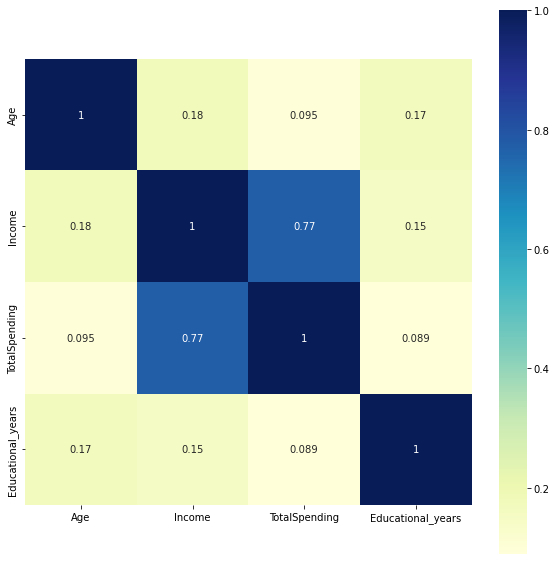

In [73]:
corr = dff.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True,annot=True, cmap = "YlGnBu")

Podemos ver que existe una alta correlación entre el Gasto Total y el Ingreso, Sin embargo, como el valor es menor que $0.8$ no se considera significativo. Vamos a realizar un análisis estadístico para confirmar o negar las diferentes correlaciones. Pero primero comprobaremos si las variables tienen una distribución gaussiana.

# Prueba de normalidad

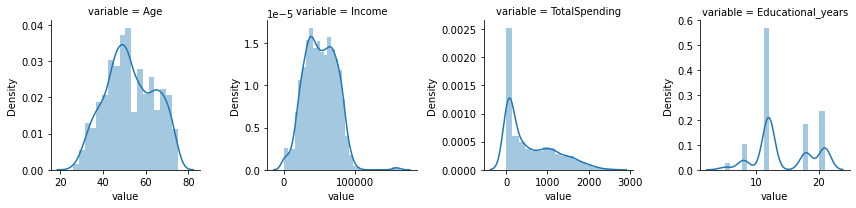

In [74]:
df = pd.DataFrame(data=data, columns=['Age','Income','TotalSpending','Educational_years'])
nd = pd.melt(df, value_vars =df )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

- La edad y los ingresos tienen distribuciones de tipo gaussiano
- El gasto tiene una distribución log-normal
- Educational_years tiene una distribución multinomial

La prueba de Shapiro demuestra si una muestra tiene distribucion normal o no.

In [75]:
X=['Age','Income','TotalSpending','Educational_years']

column_dict= {elem : pd.DataFrame() for elem in X}

def shapiro_test(data):
    stat, p = shapiro(data)
    print('%s : Estadisticas =%.3f, p=%.8f' % (column,stat, p))
    alpha = 0.05
    if p > alpha:
        print('La muestra parece gaussiana (no rechazamos H0)')
        print('')
    else:
        print('La muestra no parece gaussiana (rechazamos H0)')
        print('')

for column in X:
    column_dict[column] = data[column]
    shapiro_test(column_dict[column])

Age : Estadisticas =0.980, p=0.00000000
La muestra no parece gaussiana (rechazamos H0)

Income : Estadisticas =0.979, p=0.00000000
La muestra no parece gaussiana (rechazamos H0)

TotalSpending : Estadisticas =0.862, p=0.00000000
La muestra no parece gaussiana (rechazamos H0)

Educational_years : Estadisticas =0.832, p=0.00000000
La muestra no parece gaussiana (rechazamos H0)



Todos los valores p son inferiores a $0,05$:
Rechazamos la hipótesis nula. Nuestras variables no son gaussianas al nivel de significancia de $5$%.

### Pruebas de rango de significancia <a class="anchor" id="section_3_2"></a>
Aplicaremos la Prueba de rango de significancia Mann Whitney para demostrar que en promedio las titularidades no tienen ingresos iguales como vimos anteriormente. De manera que neustra hipotesis sera:
* __$H_0$__ : Los rangos medios de los dos grupos son iguales
* __$H_a$__ : Los rangos medios de los dos grupos no son iguales



In [85]:

Education=data[['Education','Income']]

Phd_graduate=Education[Education['Education']=='PhD']
Master_graduate=Education[Education['Education']=='Master']
Basic_graduate=Education[Education['Education']=='Basic']
Second_cycle_graduate=Education[Education['Education']=='2n Cycle']
Graduation_graduate=Education[Education['Education']=='Graduation']

alpha = 0.05
if p > alpha:
	print('La muestra parece gaussiana (no rechazamos H0)')
else:
	print('La muestra no parece gaussiana (rechazamos H0)')

La muestra parece gaussiana (no rechazamos H0)


In [86]:
stat, p = shapiro(Master_graduate.Income)
alpha = 0.05
if p > alpha:
	print('La muestra parece gaussiana (no rechazamos H0)')
else:
	print('La muestra no parece gaussiana (rechazamos H0)')

La muestra no parece gaussiana (rechazamos H0)


In [87]:

print('PhD: media = %.0f stdv = %.1f' % (median(Phd_graduate.Income), std(Phd_graduate.Income)))
print('Master: media = %.0f stdv = %.1f' % (median(Master_graduate.Income), std(Master_graduate.Income)))

if p > alpha:
	print('La muestra parece gaussiana (no rechazamos H0)')
else:
	print('La muestra no parece gaussiana (rechazamos H0)')

PhD: media = 54621 stdv = 20653.8
Master: media = 49912 stdv = 20822.7
La muestra no parece gaussiana (rechazamos H0)


- El valor p es menor que el nivel de significación de $5$%, podemos rechazar la hipótesis nula.
- Podemos concluir que el ingreso medio de los titulares de doctorado es diferente del ingreso medio de los titulares de maestría en un nivel de confianza de $95$%.
- Podemos ver que el ingreso promedio para personas con doctorado es de $54,978$ mientras que para una maestría es de $49,912$

### Prueba de rango de correlación <a class="anchor" id="section_3_3"></a>
Vamos a probar querelamente hay una correlacion entre los ingresos y los egresos.
Tomamos la hipótesis
* __$H_0$__ : No existe una asociación monótona entre los ingresos y el monto de los gastos
* __$H_a$__ :Existe una asociación monótona entre los ingresos y el monto de los gastos

In [79]:
Spending=data[['TotalSpending','Income']]

cor, pval = stats.spearmanr(Spending[['TotalSpending']], Spending[['Income']])
print("Prueba de correlación de Spearman no paramétrica: Coeficiente de correlación: %.4f, pval: %.4f" % (cor, pval))

Prueba de correlación de Spearman no paramétrica: Coeficiente de correlación: 0.8390, pval: 0.0000


- Podemos concluir que la correlación entre el ingreso y el monto del gasto es estadísticamente significativa a un nivel de confianza de $95$%.
- El alto coeficiente de correlación induce una fuerte relación positiva entre las dos variables, lo que confirma nuestra hipótesis.

### Variables categóricas: prueba chi-cuadrado para independencia<a class="anchor" id="section_3_3_2"></a>
Probaremos que no hay una correlacion entre el estado civil y el nivel educativo.
Tomamos como hipótesis
* __$H_0$__ : Education y Marital_Status son independientes
* __$H_a$__ : Education y Marital_Status no son independientes

In [80]:
Marital_Situation=data[['Education','Marital_Status']]
crosstab = pd.crosstab(Marital_Situation["Education"], Marital_Situation["Marital_Status"])
crosstab

Marital_Status,Alone,Divorced,In couple,Married
Education,,,,
2n Cycle,36,27,57,81
Basic,18,2,14,20
Graduation,254,153,282,427
Master,76,47,105,133
PhD,94,72,112,186


Podemos observar que:
   - Los titulados tienen indices mas altos de estar solteros y en parejas que el resto de categorías.
   - Las personas con un nivel de estudios básico tienen la tasa más baja de estar en pareja y solas.

In [81]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Grados de libertad = %d' % dof)
print('')
print('Frecuencias esperadas:')
print(expected)
prob = 0.95
critical = chi2.ppf(prob, dof)
print('')
print('probabilidad =%.3f, critical=%.3f, estadística=%.3f' % (prob, critical, stat))
print('')
if abs(stat) >= critical:
	print('Dependiente (Rechazamos H0)')
else:
	print('Independiente (No rechazamos H0)')
alpha = 1.0 - prob
print('significance = %.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependiente (Rechazamos H0)')
else:
	print('Independiente (No rechazamos H0)')


Grados de libertad = 12

Frecuencias esperadas:
[[ 43.75136612  27.55054645  52.17213115  77.52595628]
 [ 11.75409836   7.40163934  14.01639344  20.82786885]
 [242.91803279 152.96721311 289.67213115 430.44262295]
 [ 78.57832423  49.48132969  93.70218579 139.23816029]
 [100.99817851  63.5992714  120.43715847 178.96539162]]

probabilidad =0.950, critical=21.026, estadística=14.330

Independiente (No rechazamos H0)
significance = 0.050, p=0.280
Independiente (No rechazamos H0)


 - El valor P es mayor que el nivel de significación de $5$%, no podemos rechazar la hipótesis nula.
 - El Test-estadístico es inferior al valor crítico, no podemos rechazar la hipótesis nula.
 - Podemos concluir que el estado civil es independiente del título que se posee con un nivel de confianza de $95$%

# Custering

In [82]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,TotalSpending,Educational_years,Customer_For,NumAllPurchases,AverageCheck,ShareDealsPurchases,TotalAcceptedCmp,Days_is_client,ActiveDays
count,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,...,2196.00,2196.00,2196.00,2196.00,2196.00,2196.00,2192.00,2196.00,2196.00,2196.00
mean,5597.83,1969.34,51196.41,0.45,0.51,49.21,300.42,25.98,165.40,36.85,...,52.66,599.39,14.35,354.43,12.45,inf,inf,0.44,3152.43,3103.23
std,3245.82,11.34,22056.80,0.54,0.55,28.95,335.20,39.47,225.45,54.11,...,11.34,600.22,4.49,202.43,7.19,NaN,NaN,0.89,202.43,203.79
min,0.00,1947.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,26.00,5.00,5.00,0.00,0.00,2.70,0.00,0.00,2798.00,2701.00
25%,2830.50,1960.00,34547.75,0.00,0.00,25.00,23.00,1.00,15.00,3.00,...,44.00,68.00,12.00,180.75,6.00,12.97,8.70,0.00,2978.75,2927.00
50%,5468.00,1970.00,50694.50,0.00,0.00,49.00,172.00,8.00,66.00,12.00,...,52.00,386.50,12.00,357.00,12.00,29.60,21.10,0.00,3155.00,3104.50
75%,8430.50,1978.00,68118.00,1.00,1.00,74.00,494.00,32.00,227.75,48.00,...,62.00,1034.00,18.00,529.00,18.00,49.02,34.92,1.00,3327.00,3279.00
max,11191.00,1996.00,162397.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,...,75.00,2525.00,21.00,699.00,32.00,inf,inf,5.00,3497.00,3492.00


####  Normalización de datos

Revisando las estadísticas de datos encontraremos que estas varían mucho en cada variable, por lo tanto normalizaremos los datos. Usamos Standard Scaler para transformar las características de la columna eliminando la media y la escala a la varianza de la unidad.

In [83]:
data=data.query("NumAllPurchases!=0")
data_clustring=data[['AverageCheck', 'Days_is_client', 'NumAllPurchases']].copy()
data_clustring = (data_clustring - data_clustring.min())/(data_clustring.max() - data_clustring.min())  
data_clustring.describe()


,AverageCheck,Days_is_client,NumAllPurchases
count,2190.00,2190.00,2190.00
mean,0.02,0.51,0.37
std,0.03,0.29,0.23
min,0.00,0.00,0.00
25%,0.01,0.26,0.16
50%,0.02,0.51,0.35
75%,0.03,0.76,0.55
max,1.00,1.00,1.00


Ahora, encontraremos en cuántos grupos debemos dividir nuestros datos.

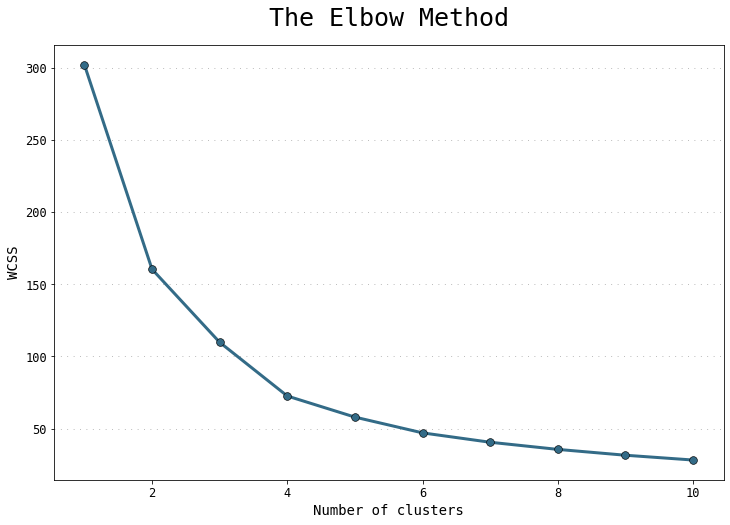

In [84]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 228)
    km.fit(data_clustring)
    wcss.append(km.inertia_)
    
plt.figure(figsize = (12, 8))
plt.title('The Elbow Method', size = 25, y = 1.03, fontname = 'monospace')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.lineplot(x = range(1, 11), y = wcss, color = '#336b87', linewidth = 3)
sns.scatterplot(x = range(1, 11), y = wcss, color = '#336b87', s = 60, edgecolor = 'black', zorder = 5)
plt.ylabel('WCSS', size = 14, fontname = 'monospace')
plt.xlabel('Number of clusters', size = 14, fontname = 'monospace')
plt.xticks(size = 12, fontname = 'monospace')
plt.yticks(size = 12, fontname = 'monospace')

plt.show()

Podemos ver que en $Numero$ $de$ $clusters$ $= 4$ el valor de $WCSS$ deja de disminuir drásticamente.

In [30]:
import plotly.express as px
gmm = GaussianMixture(n_components = 4, covariance_type = 'spherical', max_iter = 3000, random_state = 228).fit(data_clustring)
labels = gmm.predict(data_clustring)

data['Cluster'] = labels
data_re_clust = {
    0: 'Ordinary client',
    1: 'Elite client',
    2: 'Good client',
    3: 'Potential good client'
}
data['Cluster'] = data['Cluster'].map(data_re_clust)


fig = px.pie(data['Cluster'].value_counts().reset_index(), values = 'Cluster', names = 'index', width = 700, height = 700)
fig.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.8, 
                  marker = dict(colors = ['#dd4124','#009473', '#336b87', '#b4b4b4'], line = dict(color = 'white', width = 2)),
                  hovertemplate = 'Clientes: %{value}')

fig.update_layout(annotations = [dict(text = 'Número de Clientes <br> por clúster', 
                                      x = 0.5, y = 0.5, font_size = 28, showarrow = False, 
                                      font_family = 'monospace',
                                      font_color = 'black')],
                  showlegend = False)
                  
fig.show()

In [31]:
pd.options.display.float_format = "{:.0f}".format
summary=data[['Income','TotalSpending','Dt_Customer','Cluster']]
summary.set_index("Cluster", inplace = True)
summary=summary.groupby('Cluster').describe().transpose()
summary

Cluster              Elite client  Good client  Ordinary client  \
Income        count           494          535              564   
              mean          36489        67906            65299   
              std           13281        15105            16268   
              min               0            0                0   
              25%           27082        59383            55407   
              50%           36252        69142            65727   
              75%           45428        77602            75380   
              max           79410       157243           160803   
TotalSpending count           494          535              564   
              mean             88          994             1132   
              std             105          491              483   
              min               8          259              326   
              25%              37          575              723   
              50%              57          940             1101   
              75%              98         1323             1482   
              max            1370         2525             2440   

Cluster              Potential good client  
Income        count                    597  
              mean                   35039  
              std                    16127  
              min                        0  
              25%                    25410  
              50%                    34377  
              75%                    42586  
              max                   162397  
TotalSpending count                    597  
              mean                     171  
              std                      265  
              min                       11  
              25%                       44  
              50%                       85  
              75%                      207  
              max                     2252

Podemos ver que en promedio el buen cliente tiene un ingreso de $67,906$ y un gasto de $994$.
En caso contrario el cliente Ordinario, que es el segundo de mayor ingreso tiene un gasto promedio de $1132$.
Además, tenemos que el cliente Elite tiene el segundo ingreso más bajo y el primer gasto más bajo en promedio.

In [32]:
import matplotlib.lines as lines

data_cluster = data.drop(['ID', 'Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Collected'], axis = 1, inplace = True)
data_cluster = data.rename(columns = {'MntWines': 'Wines', 
                       'MntFruits': 'Fruits', 
                       'MntMeatProducts': 'Meat', 
                       'MntFishProducts': 'Fish', 
                       'MntSweetProducts': 'Sweet', 
                       'MntGoldProds': 'Gold'})

cl = ['Ordinary client', 'Potential good client', 'Good client', 'Elite client']
colors = {
    'Ordinary client': '#b4b4b4',
    'Potential good client': '#336b87',
    'Good client': '#009473',
    'Elite client': '#dd4124'
}

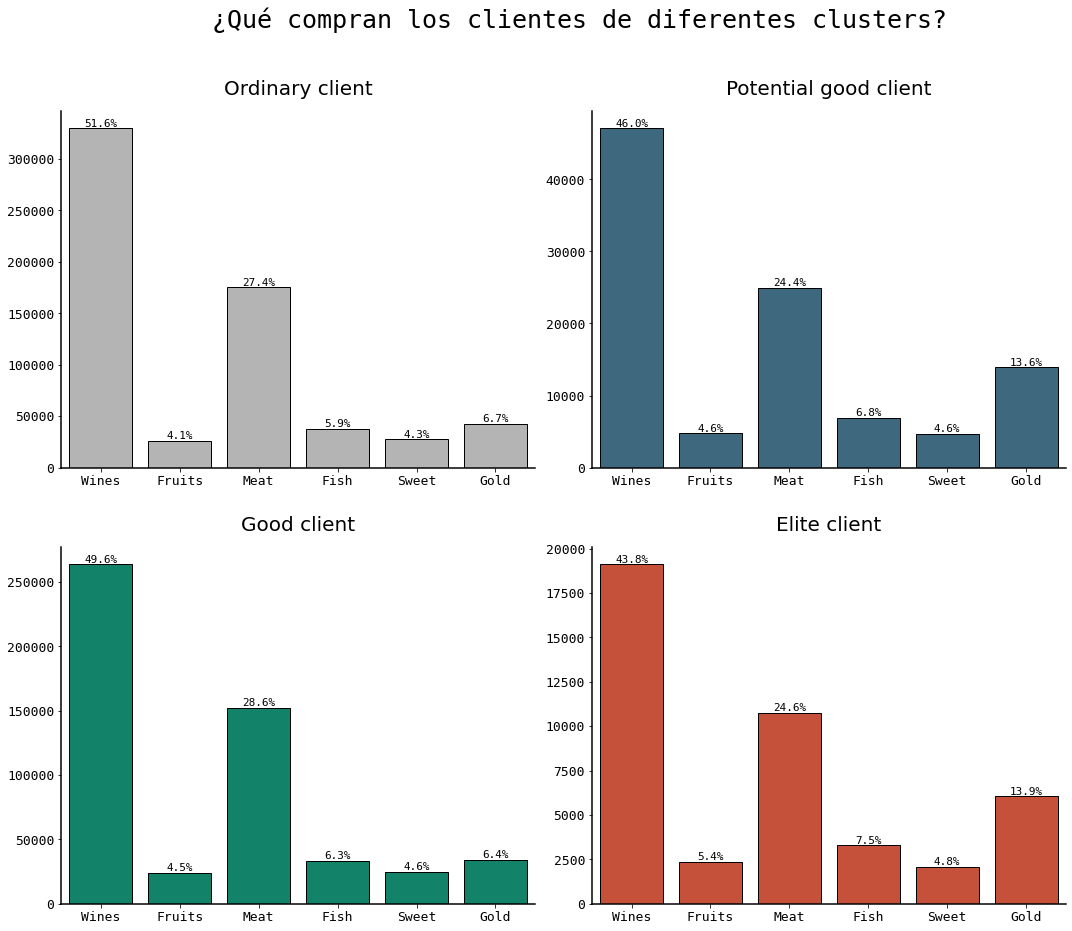

In [33]:
fig = plt.figure(figsize = (15, 12))
k = 1

for i in cl:
    ass = data_cluster.groupby(['Cluster']).agg({'Wines': 'sum', 'Fruits': 'sum', 'Meat': 'sum', 'Fish': 'sum', 'Sweet': 'sum', 'Gold': 'sum'}).transpose().reset_index().rename(columns = {'index': 'Category'})[['Category', i]]
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    a = sns.barplot(data = ass, x = 'Category', y = i, color = colors[i],
                   linestyle = "-", linewidth = 1,
                   edgecolor = "black")
    plt.xticks(fontname = 'monospace', size = 13, color = 'black')
    plt.yticks(fontname = 'monospace', size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
    for p in a.patches:
        height = p.get_height()
        a.annotate(f'{round((height / sum(ass[i])) * 100, 1)}%', (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   size = 11,
                   xytext = (0, 5), 
                   textcoords = 'offset points',
                   fontname = 'monospace', color = 'black')
        
    for j in ['right', 'top']:
        a.spines[j].set_visible(False)
    for j in ['bottom', 'left']:
        a.spines[j].set_linewidth(1.5)
    k += 1
    

    
plt.figtext(0.2, 1.05, '¿Qué compran los clientes de diferentes clusters?', fontname = 'monospace', size = 25)
fig.tight_layout(h_pad = 3)    
plt.show()

Podemos observar que
   - Los vinos son consumidos más por Clientes Ordinarios y menos por Clientes Elite.
   - Las frutas las consumen más los Clientes Élite y menos los Clientes Ordinarios. Sin embargo, esta categoría es una de las menos consumidas de todas las categorías.
   - La carne es consumida más por los Buenos Clientes y menos por los Potencialmente Buenos Clientes.
   - El pescado es consumido más por Potencialmente Buenos Clientes y menos por Potencialmente Buenos Clientes.
   - Los productos dulces son consumidos más por Clientes Élite y menos por Clientes Ordinarios.
   - Los productos Oro son consumidos más por los Clientes Élite y menos por los Buenos Clientes.
   - En general, los productos con mayores índices de consumo son el vino y la carne

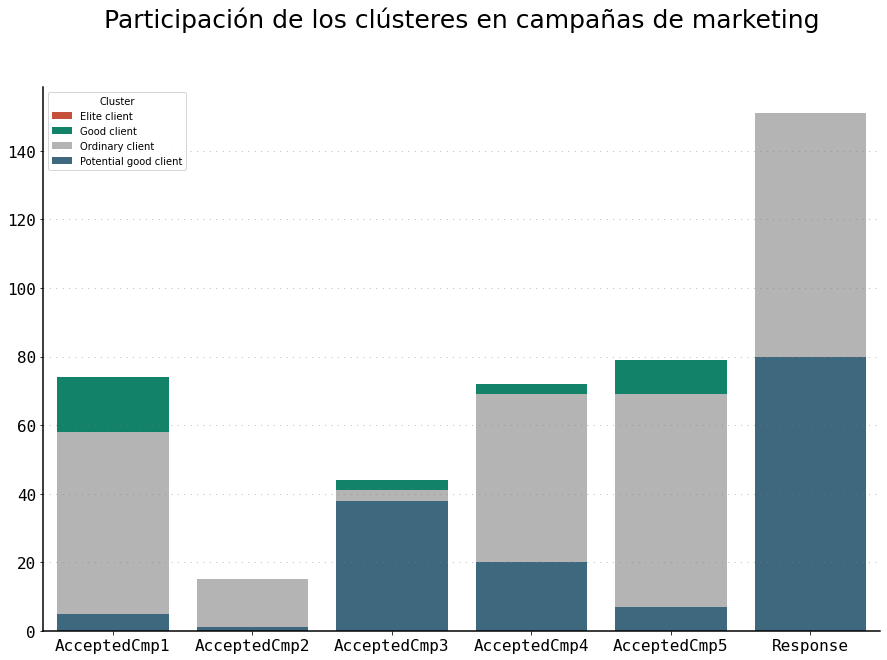

In [34]:
fig = plt.figure(figsize = (15, 10))
plt.title('Participación de los clústeres en campañas de marketing', size = 25, x = 0.5, y = 1.1)
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))
a = sns.barplot(x = 'Cmp', y = 'value', hue = 'Cluster',
            data = data.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum','AcceptedCmp2': 'sum', 
                               'AcceptedCmp3': 'sum','AcceptedCmp4': 'sum', 
                               'AcceptedCmp5': 'sum', 'Response': 'sum'}).stack().reset_index().rename(columns = {'level_1':'Cmp', 0: 'value'}),
            dodge = False, palette = ['#dd4124', '#009473', '#b4b4b4', '#336b87'])
plt.xticks(fontname = 'monospace', size = 16, color = 'black')
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')
for j in ['right', 'top']:
    a.spines[j].set_visible(False)
for j in ['bottom', 'left']:
    a.spines[j].set_linewidth(1.5)


plt.show()

Podemos observar que
  - El Cliente Ordinario tiene un impuesto más de Aceptado en la Campaña $1,2,4$ y $5$.
  - El Bien Potencial Cliente tiene una tasa mayor de Aceptación en la Campaña $3,4,5$ y $1$.
  - Buen Cliente tiene una tasa más de Aceptación en la Campaña $1,5,4$ y $3$.
  - El Cliente Elite no tiene Aceptación en ninguna Campaña.

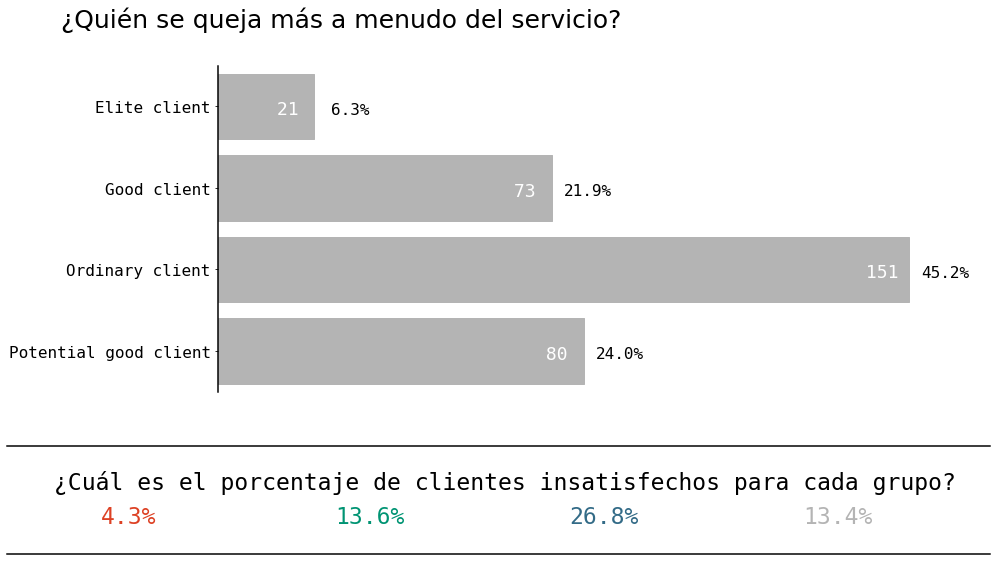

In [35]:
fig = plt.figure(figsize = (13, 6))
plt.title('¿Quién se queja más a menudo del servicio?', size = 25, x = 0.17, y = 1.1)
a = sns.barplot(data = data_cluster.groupby(['Cluster']).agg({'Response': 'sum'}).reset_index(), 
                x = 'Response', y = 'Cluster')
plt.xticks([])
plt.yticks(fontname = 'monospace', size = 16, color = 'black')
plt.xlabel('')
plt.ylabel('')

for p in a.patches:
    width = p.get_width()
    plt.text(width - 7, p.get_y() + 0.55*p.get_height(), f'{width: .0f}',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 18, color = 'white')
    plt.text(8 + width, p.get_y() + 0.55*p.get_height(), f'{round((width / 334) * 100, 1)}%',
             ha = 'center', va = 'center', fontname = 'monospace', fontsize = 16, color = 'black')
    if p.get_width() == 189:
        p.set_color('#dd4124')
    elif p.get_width() == 54:
        p.set_color('#009473')
    elif p.get_width() == 66:
        p.set_color('#336b87')
    else:
        p.set_color('#b4b4b4')
for j in ['right', 'top', 'bottom']:
    a.spines[j].set_visible(False)
a.spines['left'].set_linewidth(1.5)

l1 = lines.Line2D([-0.1, 0.95], [0, 0], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l1])

plt.figtext(-0.05, -0.1, '¿Cuál es el porcentaje de clientes insatisfechos para cada grupo?', fontname = 'monospace', size = 23, color = 'black')

x = 0
cl = 0
colors = ['#dd4124', '#009473', '#336b87', '#b4b4b4']
for i in round(data_cluster.groupby(['Cluster']).agg({'Response': 'mean'}).reset_index()['Response'] * 100, 1):
    plt.figtext(x, -0.18, f'{i}%', fontname = 'monospace', size = 23, color = colors[cl])
    x += 0.25
    cl += 1

l2 = lines.Line2D([-0.1, 0.95], [-0.25, -0.25], transform = fig.transFigure, figure = fig, color = 'black', linestyle = '-',linewidth = 1.5)
fig.lines.extend([l2])


plt.show()

Podemos ver que hay más incomodidad en el cliente Ordinario con un $26,8$% seguido por clientes buenos y potencialmente buenos.

# Modelo predictivo

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


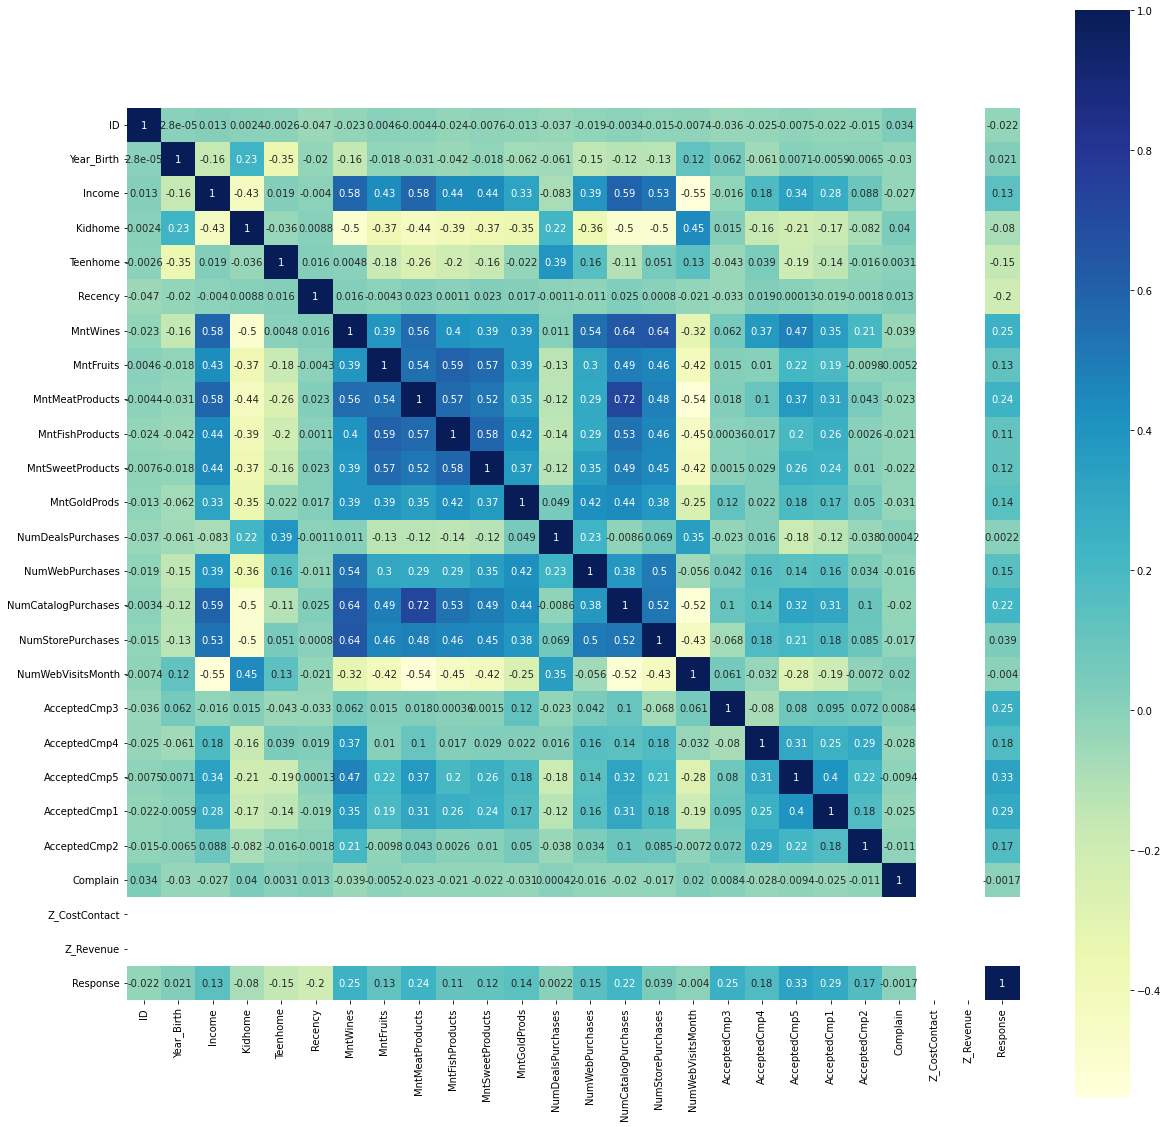

In [36]:

url = 'https://raw.githubusercontent.com/RodolfoMaya/ifood-data-business-analyst-test-latam/63bf6c72da5e144c15d2f4993be02dd3e3f8eb44/ml_project1_data.csv'

data = pd.read_csv(url)

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,square=True,annot=True, cmap = "YlGnBu")
data.head()


In [37]:
def find_correlated_features(df, threshold, target_variable):
    s = df.corr().loc[target_variable].drop(target_variable)
    return s[s.abs() >= threshold]

print(find_correlated_features(data, 0.1, 'Response'))

Income                 0
Teenhome              -0
Recency               -0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumWebPurchases        0
NumCatalogPurchases    0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Name: Response, dtype: float64


In [38]:
data = data.drop('Dt_Customer',axis=1)

Convertiremos los datos no numéricos en datos numéricos

In [39]:
nonumerical = data.select_dtypes(exclude=np.number)
columns = nonumerical.columns

for i in columns:
    print(i)
    print(data[i].unique())


Education
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Determinaremos la siguiente etiqueta:
 - Education
    - Graduation = 0
    - PhD = 1
    - Master = 2
    - Basic = 3
    - 2n Cycle = 4
 - Marital_Status
    - Alone = 0
    - In couple = 1
    - Married = 2
    - Divorced = 3
 - Has_child
    - No = 0
    - Yes = 1

In [40]:
data['Education'] = data['Education'].replace({'Graduation': 0, 'PhD': 1, 'Master':2, 'Basic':3, '2n Cycle':4 })
data['Marital_Status'] = data['Marital_Status'].replace({'Single':0, 'Together':1,'Absurd':0, 'YOLO':0,'Alone': 0, 'In couple':1, 'Married':2, 'Divorced':3,'Widow':3})

Establecemos el target y los datos, pero antes revisamos que no tengamos valores nulos.

In [41]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [42]:
data['Income'] = data['Income'].fillna(0)
x = data[['Income', 'Kidhome', 'Teenhome','Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','NumWebPurchases','NumCatalogPurchases','AcceptedCmp3',
       'AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2']]
y = data['Response']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Determinaremos cuál es el mejor modelo para los datos.

In [43]:
print('Logistic Regression')
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_test)
print(classification_report(Y_test, lr_pred))
print(accuracy_score(Y_test, lr_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       564
           1       0.47      0.14      0.21       108

    accuracy                           0.84       672
   macro avg       0.66      0.55      0.56       672
weighted avg       0.79      0.84      0.80       672

0.8363095238095238


In [44]:
print('XGBoost Classifier')
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
xgb_pred = xgb.predict(X_test)
print(classification_report(Y_test, xgb_pred))
print(accuracy_score(Y_test, xgb_pred))

XGBoost Classifier
[10:52:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       564
           1       0.59      0.38      0.46       108

    accuracy                           0.86       672
   macro avg       0.74      0.66      0.69       672
weighted avg       0.84      0.86      0.84       672

0.8571428571428571


In [45]:
print('Random Forest Classifier')

rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)
print(classification_report(Y_test, rf_pred))
print(accuracy_score(Y_test, rf_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.62      0.32      0.43       108

    accuracy                           0.86       672
   macro avg       0.75      0.64      0.67       672
weighted avg       0.84      0.86      0.84       672

0.8601190476190477


In [46]:
print('Gradient Boosting Classifier')
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb_pred = gb.predict(X_test)
print(classification_report(Y_test, gb_pred))
print(accuracy_score(Y_test, gb_pred))

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.60      0.34      0.44       108

    accuracy                           0.86       672
   macro avg       0.74      0.65      0.68       672
weighted avg       0.84      0.86      0.84       672

0.8571428571428571


In [47]:
print('Stacking Classifier')
estimators = [('xgb', XGBClassifier()),
             ('rf', RandomForestClassifier()),
             ('gb', GradientBoostingClassifier())]
stack = StackingClassifier(estimators=estimators)
stack.fit(X_train, Y_train)
stack_pred = stack.predict(X_test)
print(classification_report(Y_test, stack_pred))
print(accuracy_score(Y_test, stack_pred))

Stacking Classifier
[10:52:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:52:37] WARNING: /Users/ru

In [48]:
th = np.sort(gb.feature_importances_)
l = []
for g in th:
    select = SelectFromModel(gb, threshold = g, prefit = True)
    x_Train = select.transform(X_train)
    model = RandomForestClassifier()
    model.fit(x_Train, Y_train)
    x_Test = select.transform(X_test)
    y_pred = model.predict(x_Test)
    accuracy = accuracy_score(Y_test, y_pred)
    print('Threshold:', g, 'Model Score:', accuracy)

Threshold: 0.00395536130972341 Model Score: 0.8601190476190477
Threshold: 0.004773286509841899 Model Score: 0.8586309523809523
Threshold: 0.009671016760434296 Model Score: 0.8571428571428571
Threshold: 0.018898914781121674 Model Score: 0.8571428571428571
Threshold: 0.023582829916763155 Model Score: 0.8556547619047619
Threshold: 0.025724476480209316 Model Score: 0.8541666666666666
Threshold: 0.025874092945583405 Model Score: 0.8630952380952381
Threshold: 0.028830566717007674 Model Score: 0.8586309523809523
Threshold: 0.046467525735247456 Model Score: 0.8571428571428571
Threshold: 0.05183208629643958 Model Score: 0.8571428571428571
Threshold: 0.05605620132872611 Model Score: 0.8467261904761905
Threshold: 0.08255198547487867 Model Score: 0.8467261904761905
Threshold: 0.09650868618782348 Model Score: 0.8422619047619048
Threshold: 0.09897788921503205 Model Score: 0.8377976190476191
Threshold: 0.10124591037357474 Model Score: 0.8407738095238095
Threshold: 0.15996483483286061 Model Score: 0.8

Dado que RandomForestClassifier obtuvo una mayor precisión, tomamos este modelo.

In [49]:
fgb = RandomForestClassifier()
fgb.fit(X_train, Y_train)
fgb_pred = fgb.predict(X_test)

print('')
print('Informe de clasificacion')
print(classification_report(Y_test, fgb_pred))
print('')

print('La puntuación de rendimiento promedio final del mejor modelo optimizado es', round(accuracy_score(Y_test, fgb_pred), 4)*100, '%')


Informe de clasificacion
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       564
           1       0.62      0.33      0.43       108

    accuracy                           0.86       672
   macro avg       0.75      0.65      0.68       672
weighted avg       0.84      0.86      0.84       672


La puntuación de rendimiento promedio final del mejor modelo optimizado es 86.00999999999999 %


Realizaremos una función en la que entra un nuevo cliente y nos dice si responderá o no a la nueva campaña.

In [50]:
def add_customer_(new_data):
    if rf.predict(new_data)==0:
        print('No reponse')
    else:
        print('Reponse')

In [51]:
new_customer ={'Income':58138,'Kidhome':0,'Teenhome':0,'Recency':38, 'MntWines':10, 'MntFruits':21,
       'MntMeatProducts':10, 'MntFishProducts':4, 'MntSweetProducts':6,
       'MntGoldProds':0,'NumWebPurchases':55,'NumCatalogPurchases':2,'AcceptedCmp3':0,
       'AcceptedCmp4':1,'AcceptedCmp5':1,'AcceptedCmp1':0,'AcceptedCmp2':0}

data_new = list(new_customer.values())
lista = []
lista.append(data_new)
add_customer_(lista)

No reponse
